**THE SPARK FOUNDATION**

**DATA SCIENCE AND BUSINESS ANALYTICS INTERNSHIP- GRIP SEP 2021**

BY - Shruti Gumgaonkar



---



Task 1 - Prediction using supervised ML

To predict the percentage of a student based on the number of study hours.

In [1]:
#importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
url = "http://bit.ly/w-data"
data = pd.read_csv(url)

In [3]:
#displaying first 5 rows
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
#checking data type of data
print(type(data))

<class 'pandas.core.frame.DataFrame'>


In [6]:
#checking number of rows and columns
data.shape

(25, 2)

In [7]:
#checking for any null or missing values
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

Hence ,there are no missing values.

In [8]:
duplic = data[data.duplicated()]
print(duplic.shape)

(0, 2)


In [9]:
#counting the number of study hours and scores
data[["Hours", "Scores"]].value_counts()

Hours  Scores
9.2    88        1
4.5    41        1
1.5    20        1
1.9    24        1
2.5    21        1
       30        1
2.7    25        1
       30        1
3.2    27        1
3.3    42        1
3.5    30        1
3.8    35        1
4.8    54        1
8.9    95        1
5.1    47        1
5.5    60        1
5.9    62        1
6.1    67        1
6.9    76        1
7.4    69        1
7.7    85        1
7.8    86        1
8.3    81        1
8.5    75        1
1.1    17        1
dtype: int64

***Visualization of Data***

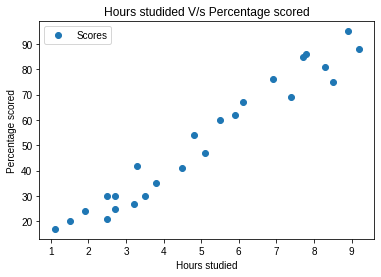

In [10]:
data.plot(x='Hours', y='Scores' , title= "Hours studided V/s Percentage scored", style='o')
plt.style.use('seaborn')
plt.xlabel("Hours studied")
plt.ylabel("Percentage scored")
plt.show()

In [12]:
#calculating correlation
data.corr(method='pearson')

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


We can see the there is a positive linear relation between hours studied and percentage secured

***Preparing Data***

In [13]:
#diving data into attributes and lables i.e input and output

In [14]:
x = data.iloc[:,: -1].values
x

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [15]:
y = data.iloc[:,1].values
y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86])

***Splitting the data into training and testing sets.***

In [19]:
#importing scikit-Learn's built-in train_test_split() and diving data into training and testing 
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

***Training the Algorithm***

In [20]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

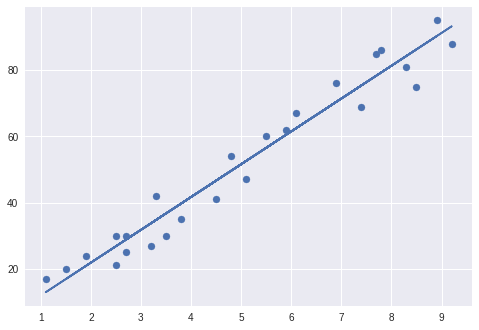

In [25]:
#plotting regression line
line = regressor.coef_*x + regressor.intercept_
plt.scatter(x,y)
plt.plot(x,line)
plt.show()

***Making Predictions***

In [26]:
print(x_test)
y_pred = regressor.predict(x_test)
print(y_pred)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]
[16.88414476 33.73226078 75.357018   26.79480124 60.49103328]


In [30]:
#comparing actual vs predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


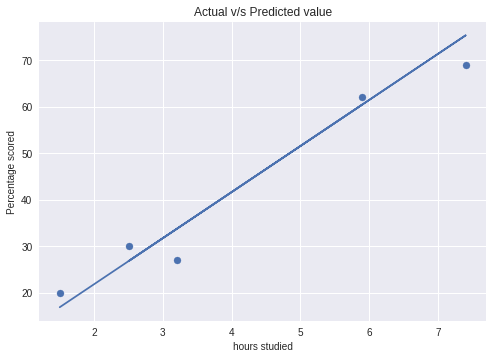

In [31]:
#plotting actual and predicted data
plt.scatter(x=x_test, y=y_test)
plt.plot(x_test , y_pred)
plt.title('Actual v/s Predicted value')
plt.xlabel('hours studied', size = 10)
plt.ylabel('Percentage scored',size = 10)
plt.show()

***Evaluating Model***

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For regression algorithms, we will use the following two commonly used evaluation metrics among others:

Mean Absolute Error

Root Mean Squared Error

In [32]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 
print('Root Mean Squared Error:', 
      np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 4.183859899002982
Root Mean Squared Error: 4.647447612100373


***What will be the predicted score if a student studies for 9.25 hours/day ?***

In [33]:
hours = [[9.25]]
own_pred = regressor.predict(hours)
print(" For {}".format(hours[0][0]), end = " ")
print("hours studied in a day, student's predicted score will be = {}".format(own_pred[0]))

 For 9.25 hours studied in a day, student's predicted score will be = 93.69173248737539
